In [22]:
!pip install ISLP==0.3.19

In [23]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [24]:
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model

In [25]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [26]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from ISLP import confusion_table
from ISLP.models import contrast

In [29]:
Weekly = load_data("Weekly")
Weekly.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up
1088,2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up


# Question 3a

In [30]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


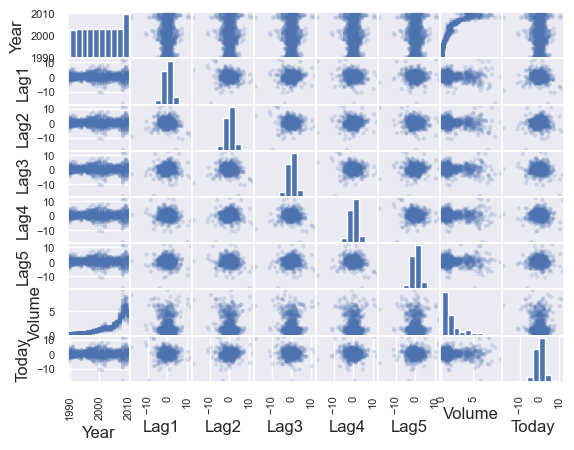

In [31]:
pd.plotting.scatter_matrix(Weekly, alpha=0.2);

In [32]:
%matplotlib inline
import seaborn as sns; sns.set()
#sns.pairplot(Weekly, hue='Direction');

In [33]:
Weekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


# Question 3b

In [34]:
Vars = Weekly.columns.drop(['Today', 'Direction', 'Year'])
design = MS(Vars)
X = design.fit_transform(Weekly)  # transform the data defined in ModelSpec
y = Weekly.Direction == 'Up'  # boolean series
glm = sm.GLM(y, X, family=sm.families.Binomial()) # specify as binomial for LR
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Sat, 28 Oct 2023   Deviance:                       1486.4
Time:                        18:00:54   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

# Question 3c

In [35]:
probs = results.predict()
labels = np.array(['Down']*1089)
labels[probs>0.5] = "Up"
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


# Question 3d

In [36]:
train = (Weekly.Year < 2009)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
allvars = Weekly.columns.drop(['Today', 'Direction', 'Year', 'Volume', 'Lag1', 'Lag3', 'Lag4', 'Lag5'])
design = MS(allvars)
X = design.fit_transform(Weekly) # transform the data defined in ModelSpec
y = Weekly.Direction == 'Up'  # boolean series

X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [37]:
D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [39]:
labels = np.array(['Down']*104)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


# Question 3E (IDA)

In [42]:
lda = LDA(store_covariance=True)
X_train, X_test = [M.drop(columns=['intercept'])  for M in [X_train, X_test]]
lda.fit(X_train, L_train)
lda_pred = lda.predict(X_test)

confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [43]:
np.mean(lda_pred == L_test)

0.625

# Question 3f(QDA)

In [44]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [45]:
np.mean(qda_pred == L_test)

0.5865384615384616

# Question 3g(KNN)

In [46]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train , L_train)
knn2_pred = knn2.predict(X_test)
confusion_table(knn2_pred , L_test)

Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


In [47]:
np.mean(knn2_pred == L_test)

0.5

# Question 6

# Question 6a

In [48]:
np.random.seed(1)
y = np.random.normal(loc=0, scale=1, size=100)
x = np.random.normal(loc=0, scale=1, size=100)
y = x - 2 * x**2 + np.random.normal(loc=0, scale=1, size=100)

# Question 6b

<Axes: >

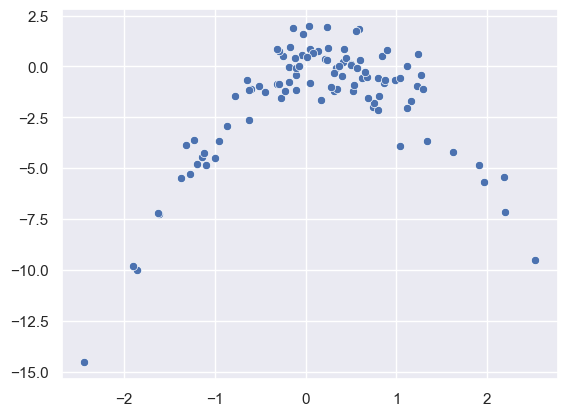

In [52]:
import seaborn as sns
sns.scatterplot(x = x , y = y)

# Question 6c

In [158]:
from sklearn.linear_model import LinearRegression

def LOOCV (df):
    y=df['y']
    X=df.iloc[:,1:]
    
    model = LinearRegression()
    model.fit(X,y)
    pred=model.predict(X)
    error = y - pred
    LOOCV_error = error**2
        
    return np.mean(LOOCV_error)

In [159]:
Data1 = pd.DataFrame({'y':y,'x':x}) #Y = β0 + β1X + ε
Data2 = Data1.copy()
Data2['x2']=Data2['x']**2 #Y = β0 + β1X + β2X2 + ε
Data3 = Data2.copy() 
Data3['x3']=Data3['x']**3 #Y = β0 + β1X + β2X2 + β3X3 + ε
Data4 = Data3.copy()
Data4['x4']=Data4['x']**4 #= β0 + β1X + β2X2 + β3X3 + β4X4 + ε.

loocv=[LOOCV(Data1),LOOCV(Data2),LOOCV(Data3),LOOCV(Data4)]
loocv

[0.931205021944751, 0.9310212259289102, 0.9254989021411361, 0.9195178806463727]

# Question 6d

In [160]:
np.random.seed(20)
Data1 = pd.DataFrame({'y':y,'x':x}) #Y = β0 + β1X + ε
Data2 = Data1.copy()
Data2['x2']=Data2['x']**2 #Y = β0 + β1X + β2X2 + ε
Data3 = Data2.copy() 
Data3['x3']=Data3['x']**3 #Y = β0 + β1X + β2X2 + β3X3 + ε
Data4 = Data3.copy()
Data4['x4']=Data4['x']**4 #= β0 + β1X + β2X2 + β3X3 + β4X4 + ε.

loocv=[LOOCV(Data1),LOOCV(Data2),LOOCV(Data3),LOOCV(Data4)]
loocv

[0.931205021944751, 0.9310212259289102, 0.9254989021411361, 0.9195178806463727]

# Question 6e

In [163]:
import statsmodels.api as sm
y=Data4['y']
X=Data4.iloc[:,1:]
    
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                             0.4936
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                       0.484
Time:                        03:29:35   Log-Likelihood:                         -138.63
No. Observations:                 100   AIC:                                      279.3
Df Residuals:                      99   BIC:                                      281.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0692      0.098      0.703      0.484      -0.126       0.265
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.069
Skew:                           0.025   Prob(JB):                        0.966
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""